In [48]:
import pandas as pd
import numpy as np

In [74]:
players=pd.read_csv(r"C:\Users\Leila\Desktop\Project\Portfolio Project\K-means Clustering Python\players_22.csv")

C:\Users\Leila\AppData\Local\Temp\ipykernel_9552\486127938.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players=pd.read_csv(r"C:\Users\Leila\Desktop\Project\Portfolio Project\K-means Clustering Python\players_22.csv")


In [75]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [76]:
features=["overall","potential","value_eur","wage_eur","age"]

In [77]:
players=players.dropna(subset=features)

In [78]:
data=players[features].copy()

In [79]:
data

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


In [80]:
data=((data-data.min())/(data.max()-data.min()))*9+1

In [81]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [82]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


In [83]:
def random_centroids(data,k):
    centroids=[]
    for i in range(k):
        centroid=data.apply(lambda x:float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [84]:
centroids=random_centroids(data,5)

In [85]:
centroids

,0,1,2,3,4
overall,5.695652,6.478261,7.456522,1.782609,3.934783
potential,5.500000,4.521739,6.478261,5.695652,7.065217
value_eur,1.129485,1.226913,1.025099,1.106288,1.050616
wage_eur,1.006438,1.708155,1.038627,1.038627,1.064378
age,3.000000,4.000000,3.333333,2.666667,5.000000


In [86]:
def get_label(data,centroids):
    distances=centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [87]:
distances=centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
distances.idxmin(axis=1)

0        2
1        2
2        2
3        2
4        2
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [88]:
distances

,0,1,2,3,4
0,11.452773,10.738780,10.472899,13.453869,11.252582
1,10.985933,10.369895,10.060192,12.992477,10.917341
2,10.139766,9.358906,9.099063,12.255713,9.765110
3,10.813345,10.276672,9.963718,12.764847,10.927900
4,12.228291,11.605449,11.466892,13.986638,12.264747
...,...,...,...,...,...
19234,6.113685,6.337027,8.107022,4.197182,6.529106
19235,5.434524,6.083758,7.474557,2.927725,5.873720
19236,5.765314,6.152437,7.788482,3.609298,6.163485
19237,5.345751,6.036383,7.384390,2.745545,5.738564


In [89]:
label=get_label(data,centroids)
label

0        2
1        2
2        2
3        2
4        2
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [90]:
label.value_counts()

0    6581
1    5841
3    4059
2    1824
4     860
dtype: int64

In [91]:
get_label(data,centroids)

0        2
1        2
2        2
3        2
4        2
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [92]:
def new_centroids(data,label,k):
    return data.groupby(label).apply(lambda x: np.exp(np.log(x).mean())).T

In [93]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from IPython.display import clear_output

In [94]:
def plot_clusters(data,labels,centroids,iteration):
    pca=PCA(n_components=2)
    data_2d=pca.fit_transform(data)
    centroid_2d=pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1],c=label)
    plt.scatter(x=centroid_2d[:,0], y=centroid_2d[:,1])
    plt.show()

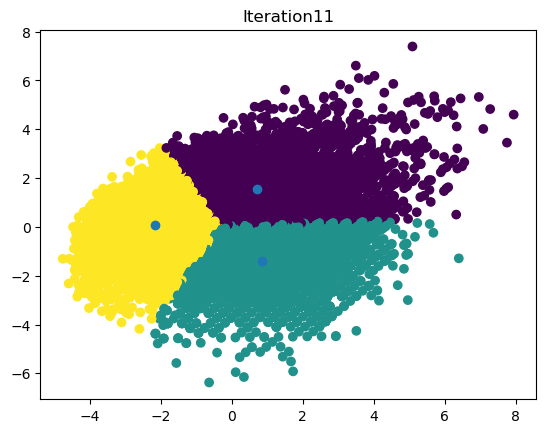

In [98]:
max_iteration=100
k=3

centroids=random_centroids(data,k)
old_centroids=pd.DataFrame()
iteration=1

while iteration<100 and not centroids.equals(old_centroids):
    old_centroids=centroids
    label=get_label(data,centroids)
    centroids=new_centroids(data,label,k)
    plot_clusters(data,label,centroids,iteration)
    iteration+=1

In [99]:
centroids

,0,1,2
overall,5.805495,4.782162,3.204497
potential,6.497727,4.507001,4.929523
value_eur,1.285414,1.044927,1.026610
wage_eur,1.419920,1.118622,1.028488
age,3.595987,5.467718,2.514966


In [100]:
players[label==2][["short_name"]+features]

,short_name,overall,potential,value_eur,wage_eur,age
7025,Sandeiro Leal,68,68,1400000.0,7000.0,21
8028,Narcisso Mau,67,67,1100000.0,4000.0,21
8029,Botelhinonsa,67,67,1100000.0,4000.0,21
8030,Edenildo Lagoas,67,67,1100000.0,3000.0,21
8040,Dener Rolim,67,67,1200000.0,4000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,70000.0,1000.0,22
19235,C. Porter,47,59,110000.0,500.0,19
19236,N. Logue,47,55,100000.0,500.0,21
19237,L. Rudden,47,60,110000.0,500.0,19


In [101]:
from sklearn.cluster import KMeans
kmeans=KMeans(3)
kmeans.fit(data)

C:\Users\Leila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [103]:
centroids=kmeans.cluster_centers_

In [106]:
pd.DataFrame(centroids,columns=features).T

,0,1,2
overall,3.600709,6.232389,4.800860
potential,5.207099,6.623530,4.503855
value_eur,1.035845,1.413999,1.040007
wage_eur,1.039990,1.657674,1.112885
age,2.712106,4.141555,5.608923
